# Advanced House Price Prediction
*by Romina Goodarzi*

[Dataset on kaggle](https://www.kaggle.com/datasets/shivachandel/kc-house-data)

## Contents
* Data Cleaning
* Data Understanding and EDA
* Data Preprocessing
* Modeling
* Evaluation
* Comparison

In [148]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Cleaning

In [6]:
data.drop(['id', 'date'], axis=1, inplace=True)

In [7]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Just 2 NaN values

In [9]:
data.dropna(inplace=True)

In [12]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
cols = data.columns

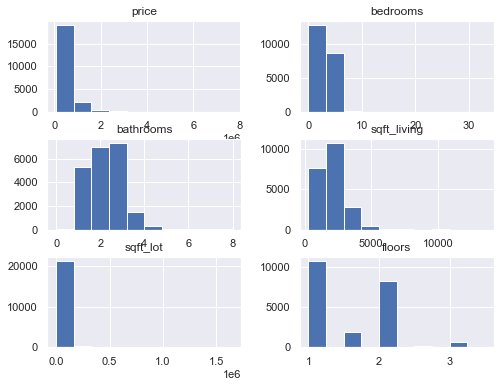

In [29]:
data[cols[0:6]].hist(figsize=(8, 6))
plt.show()

Unique values

In [38]:
for col in cols[0:6]:
    print(col, ':', data[col].nunique())

price : 4028
bedrooms : 13
bathrooms : 30
sqft_living : 1038
sqft_lot : 9782
floors : 6


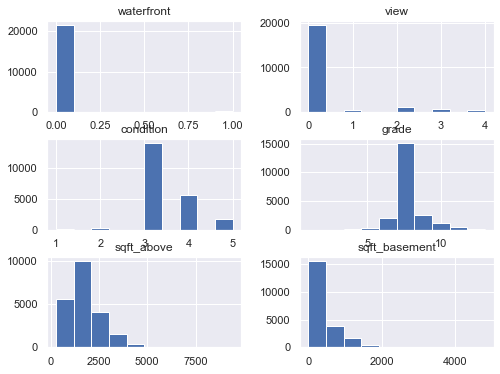

In [30]:
data[cols[6:12]].hist(figsize=(8, 6))
plt.show()

In [39]:
for col in cols[6:12]:
    print(col, ':', data[col].nunique())

waterfront : 2
view : 5
condition : 5
grade : 12
sqft_above : 946
sqft_basement : 306


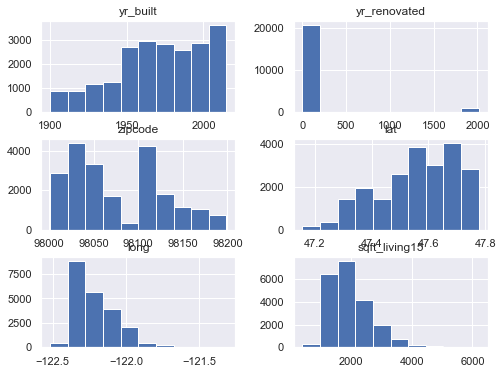

In [31]:
data[cols[12:18]].hist(figsize=(8, 6))
plt.show()

In [40]:
for col in cols[12:18]:
    print(col, ':', data[col].nunique())

yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5034
long : 752
sqft_living15 : 777


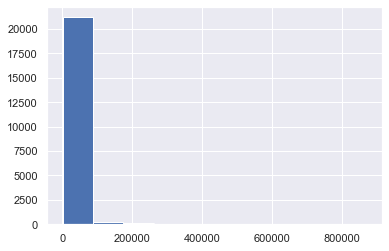

In [33]:
data[cols[18]].hist()
plt.show()

In [43]:
print(cols[18], ':', data[cols[18]].nunique())

sqft_lot15 : 8689


For sqft_basement and yr_renovated zero values are considered as NaN values

In [45]:
print(len(data[data['yr_renovated'] == 0]) / len(data) * 100, '% of yr_renovated is null')

95.7706723427884 % of yr_renovated is null


In [46]:
print(len(data[data['sqft_basement'] == 0]) / len(data) * 100, '% of sqft_basement is null')

60.732960066632735 % of sqft_basement is null


So we remove these columns

In [47]:
data.drop(['yr_renovated', 'sqft_basement'], inplace=True, axis=1)

---
## Data Understanding and EDA

In [48]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,1987,98074,47.6168,-122.045,1800,7503


In [49]:
data.shape

(21611, 17)

### Correlation analysis

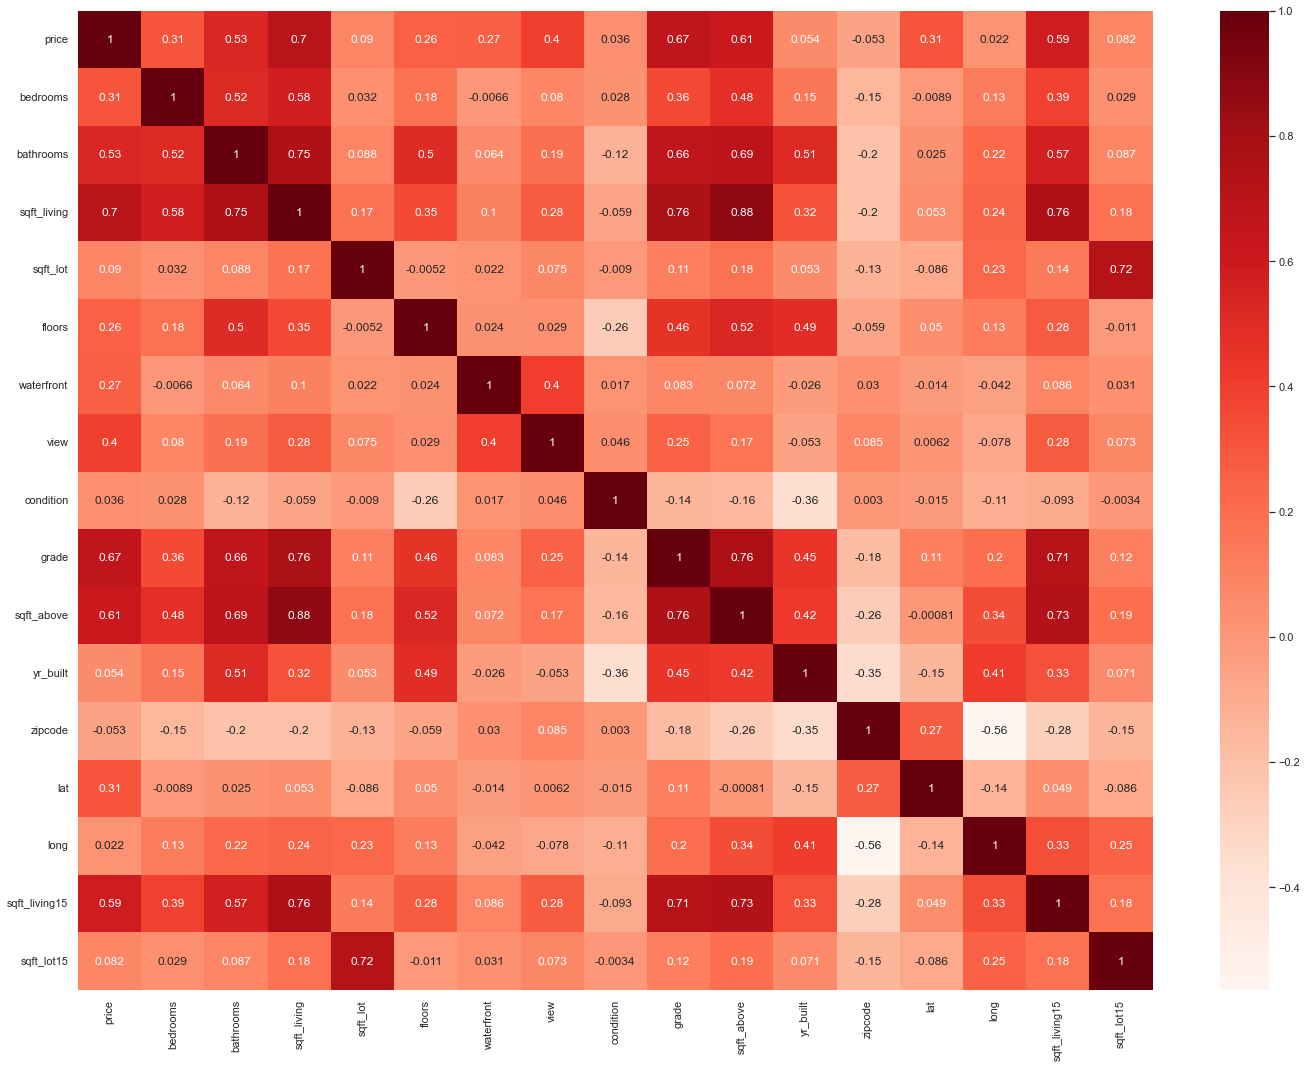

In [50]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.tight_layout()

### Average house price for number of bedrooms

In [58]:
bedrooms_price_df = pd.DataFrame({'Number of bedrooms' : sorted(data['bedrooms'].unique()),
                                  'Price' : data.groupby('bedrooms')['price'].mean()})
fig = px.bar(bedrooms_price_df, x='Number of bedrooms',  y='Price', title='The average house price for each number of bedrooms',
             color='Number of bedrooms')
fig.show()

### Average house price for each grade

In [59]:
grade_price_df = pd.DataFrame({'The grade of house' : sorted(data['grade'].unique()),
                                'Price' : data.groupby('grade')['price'].mean()})
fig = px.bar(grade_price_df, x='The grade of house', y='Price', color='The grade of house',
             title='The average house price for each grade of houses')
fig.show()

### Average house price for each number of bathrooms

In [61]:
grade_price_df = pd.DataFrame({'The number of bathrooms' : sorted(data['bathrooms'].unique()),
                                'Price' : data.groupby('bathrooms')['price'].mean()})
fig = px.bar(grade_price_df, x='The number of bathrooms', y='Price', color='The number of bathrooms',
             title='The average house price for each number of bathrooms')
fig.show()

### Average house price for each view grade of houses

In [62]:
grade_price_df = pd.DataFrame({'The view grade' : sorted(data['view'].unique()),
                                'Price' : data.groupby('view')['price'].mean()})
fig = px.bar(grade_price_df, x='The view grade', y='Price', color='The view grade',
             title='The average house price for each view grade of houses')
fig.show()

---
## Data Preprocessing

In [66]:
X = data.drop(['price', 'zipcode'], axis=1)
y = data['price']

In [67]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,1955,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1951,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,1933,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1965,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,1987,47.6168,-122.045,1800,7503


Scaling

In [74]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [76]:
y = np.log(y)

In [77]:
X.shape

(21611, 15)

In [80]:
y.shape

(21611,)

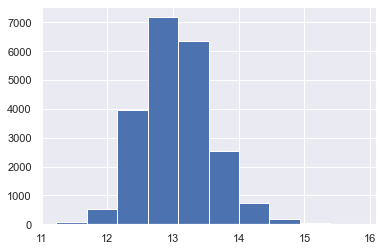

In [79]:
plt.hist(y)
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

---
## Modeling and Evaluation

### 1. XGBoost

In [86]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [120]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, max_depth=3, colsample_bytree=.5,
                          learning_rate=0.001, random_state=14, subsample=.5, n_jobs=-1, eval_metric='mae',
                          verbosity=0, gamma=0.1)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eval_metric='mae', gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=14,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [121]:
xgb_reg.score(X_train, y_train)

0.8855990221554072

In [113]:
xgb_reg.score(X_test, y_test)

0.8780646527590441

r2 score for xgboost is 0.878

### 2. Catboost

In [139]:
catb_reg = CatBoostRegressor(loss_function='RMSE', iterations=1000, depth=3, colsample_bylevel=.4,
                             eval_metric='MAE', subsample=.5, random_state=10, verbose=0, eta=.2)
catb_reg.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [136]:
catb_reg.score(X_train, y_train)

0.9257715795550736

In [137]:
catb_reg.score(X_test, y_test)

0.9017355052760399

r2 score for Catboost regressor is 0.90

### 3. Random Forest

In [143]:
rf_reg = RandomForestRegressor(n_estimators=10000, max_depth=3, random_state=14, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10000, n_jobs=-1,
                      random_state=14)

In [153]:
r2_score(y_train, rf_reg.predict(X_train))

0.6962014965825829

In [144]:
r2_score(y_test, rf_reg.predict(X_test))

0.6875274138573244

r2 score is 0.68 for random forest

### 4. SVR

In [167]:
svr = SVR(kernel='rbf', C=0.5, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

SVR(C=0.5)

In [168]:
r2_score(y_train, svr.predict(X_train))

0.8792788102869707

In [169]:
r2_score(y_test, svr.predict(X_test))

0.8601592847181123

r2 score for SVR is 0.86

---
## Comparison
In this part I compare MAE and r2 score between models

### Mean Absolute Error Comparison

In [170]:
xgboost_mae = mean_absolute_error(y_true=y_test, y_pred=xgb_reg.predict(X_test))
catboost_mae = mean_absolute_error(y_true=y_test, y_pred=catb_reg.predict(X_test))
rf_mae = mean_absolute_error(y_true=y_test, y_pred=rf_reg.predict(X_test))
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr.predict(X_test))
score_df = pd.DataFrame({'MAE' : [xgboost_mae, catboost_mae, rf_mae, svr_mae], 'Models' : ['XGBoost', 'CatBoost', 'RF', 'SVR']})
px.histogram(score_df, x='Models', y='MAE', color='Models', barmode='overlay', title='Regression Model MAE')

### R2 Score Comparison

In [172]:
xgboost_mae = r2_score(y_true=y_test, y_pred=xgb_reg.predict(X_test))
catboost_mae = r2_score(y_true=y_test, y_pred=catb_reg.predict(X_test))
rf_mae = r2_score(y_true=y_test, y_pred=rf_reg.predict(X_test))
svr_mae = r2_score(y_true=y_test, y_pred=svr.predict(X_test))
score_df = pd.DataFrame({'R2 Score' : [xgboost_mae, catboost_mae, rf_mae, svr_mae], 
                         'Models' : ['XGBoost', 'CatBoost', 'RF', 'SVR']})
px.histogram(score_df, x='Models', y='R2 Score', color='Models', barmode='overlay', title='Regression Model Score')